# First, create 4 mcmc runs and save them as .bund files 

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
from bounce import state
from bounce import driver
import numpy as np

In [3]:
initial_state = state.State(planets=[{"m":0.001, "a":0.1, "h":0.1, "k":0.15, "l":1.0}])
initial_state.hillRadiusFactor = 1.
np.random.seed(2018)
obs = driver.create_obs(initial_state, 100, 5.0e-4, 5.0e-5, 1.0)

In [4]:
N_walkers = 20
N_iterations = 300*N_walkers
emcee_init_scale = {"m":0.00001, "a":.01, "h":0.001, "k":0.001, "l":0.01*2.*np.pi}

In [5]:
for i in range(4):
    np.random.seed()
    label = 'emcee_fuse_test_{a}'.format(a=i)
    emcee_bundle, emcee_bundle_hash = driver.run_emcee(label, 
                                                       N_iterations, 
                                                       initial_state, 
                                                       obs,
                                                       N_walkers,
                                                       emcee_init_scale,
                                                       printing_every=200)
    driver.save_data(emcee_bundle, emcee_bundle_hash)
    driver.save_aux(emcee_bundle, emcee_bundle_hash)

Progress: 0.33333%, time: 2017-10-20 16:00:29.729464
Invalid state was proposed (m)
Collision! 2017-10-20 16:00:51.971495
Collision! 2017-10-20 16:00:57.090606
Progress: 67.0%, time: 2017-10-20 16:00:57.372679
Collision! 2017-10-20 16:00:57.459936
Invalid state was proposed (h & k)
Collision! 2017-10-20 16:01:02.810326
Invalid state was proposed (h & k)
Collision! 2017-10-20 16:01:06.486802
Invalid state was proposed (h & k)
Invalid state was proposed (m)
Collision! 2017-10-20 16:01:09.370863
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Invalid state was proposed (h & k)
Collision! 2017-10-20 16:01:10.871680
Collision! 2017-10-20 16:01:11.027129
Collision! 2017-10-20 16:01:11.333843
Invalid state was proposed (h & k)
Error(s): 0
Acceptance rate: 57.283%
The id of the simulation is: b06bd8e92b25b16fa414fa33ed0f25a1
The end time of the simulation is 2017-10-20 16:01:11.614126
Progress: 0.33333%, time: 2017-10-20 16:01:12.064203


In [6]:
alpha = 1.
N_iterations = 300
eps = 0.95

In [7]:
for i in range(4,8):
    np.random.seed()
    label = 'smala_fuse_test_{a}'.format(a=i)
    smala_Bundle, smala_Hash = driver.run_smala(label,
                                                N_iterations,
                                                initial_state,
                                                obs,
                                                eps,
                                                alpha,
                                                200)
    driver.save_data(smala_Bundle, smala_Hash)
    driver.save_aux(smala_Bundle, smala_Hash)

Progress: 0.33333%, 1 accepted steps have been made, time: 2017-10-20 16:03:14.227512
Invalid state was proposed (h & k)
Progress: 67.0%, 107 accepted steps have been made, time: 2017-10-20 16:03:41.971467
Acceptance rate: 52.00%
The id of the simulation is: 26cbae15072b3acb599028517e5b6c74
The end time of the simulation is 2017-10-20 16:03:55.432191
Progress: 0.33333%, 2 accepted steps have been made, time: 2017-10-20 16:03:55.900817
Progress: 67.0%, 98 accepted steps have been made, time: 2017-10-20 16:04:23.741439
Acceptance rate: 47.00%
The id of the simulation is: 5029806e0785e66fbaac2d717ce6ea00
The end time of the simulation is 2017-10-20 16:04:37.848812
Progress: 0.33333%, 1 accepted steps have been made, time: 2017-10-20 16:04:38.251295
Invalid state was proposed (h & k)
Progress: 67.0%, 104 accepted steps have been made, time: 2017-10-20 16:05:06.275958
Acceptance rate: 51.00%
The id of the simulation is: e931dac1ac09c1a873e4f2f93d57b562
The end time of the simulation is 2017

# We can access these .bund files to fuse them and do data-processing

In [8]:
import glob
import cPickle as pickle

In [9]:
list_of_bundle_names = sorted(glob.glob('./emcee_fuse_test_*.bund'))
list_of_emcee_bundles = []
for i in range(len(list_of_bundle_names)):
    list_of_emcee_bundles.append(pickle.load( open(list_of_bundle_names[i] , "rb") ))
    
list_of_bundle_names = sorted(glob.glob('./smala_fuse_test_*.bund'))
list_of_smala_bundles = []
for i in range(len(list_of_bundle_names)):
    list_of_smala_bundles.append(pickle.load( open(list_of_bundle_names[i] , "rb") )) 

In [10]:
driver.fuse_bundle(list_of_emcee_bundles[0], list_of_emcee_bundles[1], mode=1)
for i in range(1,len(list_of_emcee_bundles) -1):
    driver.fuse_bundle(list_of_emcee_bundles[0], list_of_emcee_bundles[i+1])
    
driver.fuse_bundle(list_of_smala_bundles[0], list_of_smala_bundles[1], mode=1)
for i in range(1,len(list_of_smala_bundles) -1):
    driver.fuse_bundle(list_of_smala_bundles[0], list_of_smala_bundles[i+1])

Eliminated burn in, sampled every 1.
Eliminated burn in, sampled every 1.
Eliminated burn in, sampled every 1.
Eliminated burn in, sampled every 1.
Eliminated burn in, sampled every 1.
Eliminated burn in, sampled every 1.
Eliminated burn in, sampled every 1.
Eliminated burn in, sampled every 1.


Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$']
[  1.00000297e-01   1.01037033e-01   1.37802063e-01   9.83687357e-04
   9.92366646e-01]


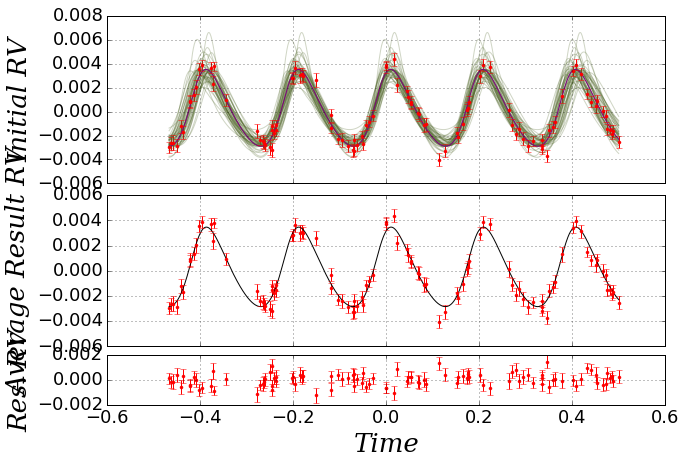

In [11]:
driver.plot_trimmed_results(list_of_emcee_bundles[0], 50, [10,3])

Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$']
[  1.00072075e-01   1.39704092e-01   1.23720405e-01   9.91113831e-04
   1.03917703e+00]


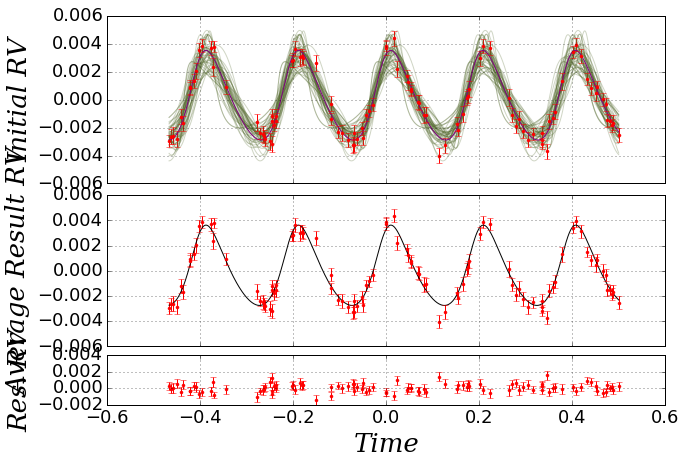

In [12]:
driver.plot_trimmed_results(list_of_smala_bundles[0], 50, [10,3])

In [13]:
driver.plot_ACTimes(list_of_emcee_bundles[0], [10,5])

AC time [ 14.8         19.43835705]
AC time [ 14.8125      18.67922643]
AC time [ 14.325       16.95769752]
AC time [ 15.45        18.57643655]
AC time [ 14.4125      17.34342842]


In [14]:
driver.plot_ACTimes(list_of_smala_bundles[0], [10,5])

AC time [ 3.          3.47406601]
AC time [ 3.          4.96396359]
AC time [ 3.          4.96140587]
AC time [ 2.          3.48040002]
AC time [ 3.         5.0645952]
